<a href="https://colab.research.google.com/github/thashmadech/is417-project/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import dask
import re, string, unicodedata
from gensim.parsing.preprocessing import remove_stopwords
import nltk
from nltk import ngrams, word_tokenize, sent_tokenize, FreqDist
from nltk.tokenize import TweetTokenizer
from tqdm import tqdm
from textblob import TextBlob


# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt



In [2]:
df_tweets = pd.read_csv('/content/drive/MyDrive/is417-project/Bitcoin_tweets.csv',engine='python',encoding='utf-8', error_bad_lines=False, dtype='str')


In [3]:
df_tweets.sample(20)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
488268,CA Varun Agarwal,Hyderabad,Chartered Accountant | Serial Entrepreneur | I...,2011-11-07 16:49:10,1316.0,256.0,187.0,False,2021-07-20 18:55:33,#Bitcoin below 30K. \n&gt; 50% down from its A...,['Bitcoin'],Twitter for Android,False
311034,cry me a COIN 🕹👾👾👾🕹,NaN,NaN,2017-06-05 21:17:42,16707.0,461.0,392.0,False,2021-07-03 16:18:04,What if the lil shit is on to something...\n\n...,"['Bitcoin', 'savethewassies']",Twitter Web App,False
814280,Kiến Hùng,"Hồ Chí Minh, Việt Nam",NaN,2014-09-06 13:14:56,1.0,2.0,2.0,False,2021-08-07 12:43:00,@PancakeBunnyFin @StarboundFin\n\nThe FIRST BS...,"['launchpad', 'ETF', 'staking', 'altcoin', 'BTC']",Twitter Web App,False
929303,Crypto Anarma,NaN,"Meme coin shiller, not financial advisor, just...",2013-08-22 18:13:15,118.0,238.0,2302.0,False,2021-08-18 12:04:10,@ShibIndia @india_shibinu @CryptoSnehasish #KI...,"['KISHUARMY', 'DogecoinToTheMoon', 'dogearmy',...",Twitter for Android,False
1000038,KG,NaN,#Bitcoin,2021-02-24 21:36:56,29.0,134.0,3270.0,False,2021-08-15 12:50:00,How i think the top 10 projects in #cryptocurr...,"['cryptocurrencies', 'Bitcoin', 'Ethereum', 'B...",Twitter for Android,False
875860,Matt - screeching voice of the minority,"Brooklyn, NY",#Bitcoin ⚡️🇺🇸,2009-03-16 04:34:11,267.0,573.0,1075.0,False,2021-08-20 14:05:27,#Bitcoin fixes this. https://t.co/OgTZYAYXNO,['Bitcoin'],Twitter for iPhone,False
701695,Now on Bitcoin 🇬🇧,"London, England 🇬🇧",Donate #DogeCoin D6eMDZcFLdWLabe3EwasqXjepoMiV...,2017-07-11 18:14:29,4285.0,329,19494,False,2021-07-26 07:08:18,"Amazon Readying to Accept Bitcoin, Ethereum, C...","['btc', 'bitcoin', 'cryptocurrency', 'ethereum...",IFTTT,False
845262,Md Rony,Bangladesh,"crypto lover,🤑 ✌️🖤",2018-11-22 07:11:46,19.0,330.0,553.0,False,2021-08-05 10:09:17,@CryptoMashiah @CryptoQueenLucy @HentaiDogeBSC...,"['hentaidoge', 'cryptocurrency', 'crypto', 'bt...",Twitter for Android,False
152810,"Rekt, Esq. (Partner) @ Pleb Associates","New York, NY",Rekt 24/7,2017-06-21 00:51:27,288.0,379,2720,False,2021-06-23 03:56:08,CHINA FUD is REAL. #bitcoin https://t.co/VmJ8...,['bitcoin'],Twitter for iPhone,False
878466,Topcrypostats,Blockchain,Stats every hour of the top 10 crypto currencies,2016-04-30 15:47:58,4355.0,0.0,0.0,False,2021-08-20 12:00:04,"Bitcoin - BTC\nPrice: $46,948.10\nChange in 1h...","['Bitcoin', 'BTC']",CoinStats,False


In [4]:
df_tweets.dtypes


user_name           object
user_location       object
user_description    object
user_created        object
user_followers      object
user_friends        object
user_favourites     object
user_verified       object
date                object
text                object
hashtags            object
source              object
is_retweet          object
dtype: object

In [5]:
df_tweets.shape

(1232809, 13)

In [6]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232809 entries, 0 to 1232808
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   user_name         1232784 non-null  object
 1   user_location     647838 non-null   object
 2   user_description  1088181 non-null  object
 3   user_created      1232807 non-null  object
 4   user_followers    1232805 non-null  object
 5   user_friends      1232805 non-null  object
 6   user_favourites   1232805 non-null  object
 7   user_verified     1232805 non-null  object
 8   date              1232805 non-null  object
 9   text              1232805 non-null  object
 10  hashtags          1216000 non-null  object
 11  source            1229435 non-null  object
 12  is_retweet        1232749 non-null  object
dtypes: object(13)
memory usage: 122.3+ MB


In [ ]:
#df_tweets[df_tweets['date']=="['ETH', 'BTC', 'Bitcoin']"]

In [7]:
for x in tqdm(df_tweets['date']):
  try:
    pd.to_datetime(x)
  except:
    print(x)

  5%|▌         | 65627/1232809 [00:09<02:52, 6784.13it/s]

['ETH', 'BTC', 'Bitcoin']


 11%|█         | 138370/1232809 [00:20<02:45, 6617.27it/s]

['cryptocurrency', 'BSC', 'Bitcoin', 'Ethereum', 'ETH', 'Airdrop', 'bounty', 'ESHOP', 'Airdrops']


 15%|█▍        | 181300/1232809 [00:26<02:33, 6850.15it/s]

['YieldFarming', 'Airdrop', 'Binance', 'Bitcoin', 'pancakeswap', 'BNB', 'cryptocurrency', 'DeFi', 'BTC', 'BinanceSmartChain', 'BSC', 'pufferswap', 'DeFi', 'bsc', 'bnb', 'bitcoin', 'cryto', 'Airdrop', 'Airdrop']


 56%|█████▋    | 694435/1232809 [01:40<01:21, 6629.63it/s]

['btc']


 57%|█████▋    | 698726/1232809 [01:41<01:15, 7083.44it/s]

['btc']


 87%|████████▋ | 1068510/1232809 [02:34<00:23, 6896.90it/s]

['YieldFarming', 'Airdrop', 'PancakeSwap', 'Giveaway', 'BTC', 'BNB', 'Binance', 'BSC', 'cryptocurrency']


100%|██████████| 1232809/1232809 [02:58<00:00, 6893.56it/s]


In [10]:
#pip install swifter


     |████████████████████████████████| 296 kB 5.3 MB/s 
     |████████████████████████████████| 132 kB 53.6 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [45]:
import swifter
def datetime_checker(x):
    try:
      return pd.to_datetime(x, errors='coerce')
    except:
      return x



df_tweets['datetime'] = df_tweets['date'].apply(datetime_checker)


In [ ]:
def is_datetime(x):
    try:
      pd.to_datetime(x)
      return True
    except:
      return False

df_tweets['is_datetime'] = df_tweets['date'].apply(is_datetime)

In [11]:
df_tweets = df_tweets[df_tweets.is_datetime != False]

In [ ]:
#df_tweets.info()

In [12]:
df_tweets['datetime'] = pd.to_datetime(df_tweets['datetime'])
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232803 entries, 0 to 1232808
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   user_name         1232778 non-null  object        
 1   user_location     647832 non-null   object        
 2   user_description  1088175 non-null  object        
 3   user_created      1232801 non-null  object        
 4   user_followers    1232799 non-null  object        
 5   user_friends      1232799 non-null  object        
 6   user_favourites   1232799 non-null  object        
 7   user_verified     1232799 non-null  object        
 8   date              1232799 non-null  object        
 9   text              1232799 non-null  object        
 10  hashtags          1215994 non-null  object        
 11  source            1229435 non-null  object        
 12  is_retweet        1232749 non-null  object        
 13  datetime          1232799 non-null  dateti

In [13]:
df_tweets['datetime'].describe(datetime_is_numeric=True)

count                          1232799
mean     2021-07-17 21:37:14.467366912
min                2021-02-05 10:52:04
25%                2021-07-04 12:41:46
50%                2021-07-26 11:31:48
75%         2021-08-16 21:20:29.500000
max                2021-09-10 23:59:49
Name: datetime, dtype: object

In [14]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
df_tweets['text'].replace({'https': '<br>'}, regex=True)

0          Blue Ridge Bank shares halted by NYSE after #b...
1          😎 Today, that's this #Thursday, we will do a "...
2          Guys evening, I have read this article about B...
3          $BTC A big chance in a billion! Price: \487264...
4          This network is secured by 9 508 nodes as of t...
                                 ...                        
1232804    @SpeedUpBSC @debi_pada @AdaTiers @golf_grinder...
1232805    This time, what will happen between the US SEC...
1232806                          One #btc is only 205 #EGLD.
1232807    Want to join a group that posted TSLA 745P day...
1232808    cabanacrypto is live! @CabanaCrypto\n\n"HEX Ha...
Name: text, Length: 1232803, dtype: object

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
def preprocess_text(text_data, stopwords):

    # tqdm is for printing the status bar
    preprocessed_text = []

    for sentence in tqdm(text_data):

        if sentence is None:
          preprocessed_text.append("")
        else:
          sent = decontracted(sentence)
          sent = sent.replace('\\r', ' ')
          sent = sent.replace('\\n', ' ')
          sent = sent.replace('\\"', ' ')
          sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
          sent = re.sub(r'\W*\b\w{1,2}\b', '', sent)
          sent = re.sub('https?:\/\/\S+', '', sent)
          sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
          preprocessed_text.append(sent.lower().strip())
    
    return preprocessed_text

In [18]:
preprocessed_text = preprocess_text(df_tweets['text'].values, stopwords)

100%|██████████| 1232803/1232803 [02:15<00:00, 9071.47it/s]


In [ ]:
len(preprocessed_text)

In [ ]:
preprocessed_text

In [19]:
def cleanse_sentence(sentence):

  test = sentence.split()
  

  try:
    #test = test.remove(test[-1])
    val = test.index('https')
    words = [test[val], test[val+1], test[val+2]]
  except:
    return sentence.replace("https", "")
  
  test.remove(words[0])
  test.remove(words[1])
  test.remove(words[2])
  
  
  

  return " ".join(test)

In [20]:
preprocessed_text = list(map(cleanse_sentence, preprocessed_text))

In [21]:
preprocessed_text

['blue ridge bank shares halted nyse bitcoin atm announcement https sgbxmkp1si',
 'today thursday take friend leowandersleb btc wallet security expe  go6adgrml5',
 'guys evening read article btc would like share o6wn7ppkvy',
 'btc big chance billion price 4872644 2021 bitcoin btc crypto',
 'network secured 508 nodes today soon biggest bears recognise btc big fail  1xovda8rkw',
 'trade crypto binance enjoy cashback trading fee sign link fc7dg5oi8w',
 'fire amp aman bitcoin crypto btc  cv9iyody55',
 'prices update eur hour btc 37082 eth 1441 xrp  y3wlhav2sx',
 'btc bitcoin ethereum eth crypto cryptotrading rsr know told guys target 060 know  bvetsnhs67',
 'tesla bitcoin investment revolutionary crypto firms may not yet jpmorgan  wykwfh0elw',
 'annnd btc bitcoin headed even higher  ehadui087d',
 'prices update usdt hour btc 44853 eth 1740 xrp  v5ogvw7klm',
 'join first virtual crypto meetup 2021 crypto fridays something everyone whether  rpindw6hcc',
 'bitcoin btc btc gbtc riot mara eth e

In [22]:
df_tweets['text'] = preprocessed_text
df_tweets['text'][0]





'blue ridge bank shares halted nyse bitcoin atm announcement https sgbxmkp1si'

In [23]:
 
df_first_half = df_tweets.sort_values('datetime',ascending=True).head(int(df_tweets.shape[0]*.5))
df_second_half = df_tweets.sort_values('datetime',ascending=False).head(int(df_tweets.shape[0]*.5))


In [24]:
pip install --upgrade vaderSentiment

     |████████████████████████████████| 125 kB 5.2 MB/s 


In [ ]:
#pip install --upgrade pyspark


In [35]:
def getSubjectivity(twt):
  try:
    return TextBlob(twt).sentiment.subjectivity
  except:
    return twt
   

def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity


df_first_half['Subjectivity'] = df_first_half['text'].apply(lambda x: getSubjectivity(x))
df_first_half['Polarity'] = df_first_half['text'].apply(lambda x: getPolarity(x))



In [ ]:
df_first_half.sample(50)

In [27]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
df_first_half['text_token'] = df_first_half['text'].apply(tokenizer.tokenize)



In [28]:
df_first_half['text_token'].sample(10)


143420    [security, tokens, token, representation, some...
240343    [bitcoin, price, dollar, btc, usd, btcusd, xbt...
532651    [dcaing, bitcoin, way, peacefully, protesting,...
563928    [join, celsius, network, using, referral, code...
405822    [according, thecryptolark, ethereum, network, ...
197029    [crypto, caden, telegram, arminerorr, mandanam...
565032                                   [bitcoin, embrace]
486890    [price, bitcoin, currently, 886, crypto, btc, ...
60369     [michael, saylor, extremly, strong, resistance...
209735    [crypto, kgreifeld, dliedtka, microstrategy, m...
Name: text_token, dtype: object

In [ ]:
# df_first_half['stemmed_text'].sample(50)

In [29]:
lm = nltk.WordNetLemmatizer()
nltk.download('wordnet')

def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df_first_half['lemm_text'] = df_first_half['text_token'].apply(lambda x: lemmatizer_on_text(x))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df_first_half['lemm_text'].head()

In [30]:
#sentiment analysis using vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

scores = []
for sentence in df_first_half['text']:
  score = analyser.polarity_scores(sentence)
  scores.append(score)
  
scores = pd.DataFrame(scores)

df_first_half['Compound'] = scores['compound']
df_first_half['Negative'] = scores['neg']
df_first_half['Neutral'] = scores['neu']
df_first_half['Positive'] = scores['pos']


In [ ]:
df_first_half.sample()

In [31]:
from collections import Counter
d = Counter(" ".join(df_first_half["text"]).split()).most_common(20)




In [32]:
df_freq_words = pd.DataFrame(d, columns=['Word', 'Frequency'])

df_freq_words

,Word,Frequency
0,bitcoin,598119
1,btc,296036
2,crypto,171983
3,cryptocurrency,97495
4,project,85134
5,eth,73195
6,ethereum,68727
7,price,67789
8,https,62871
9,binance,61770


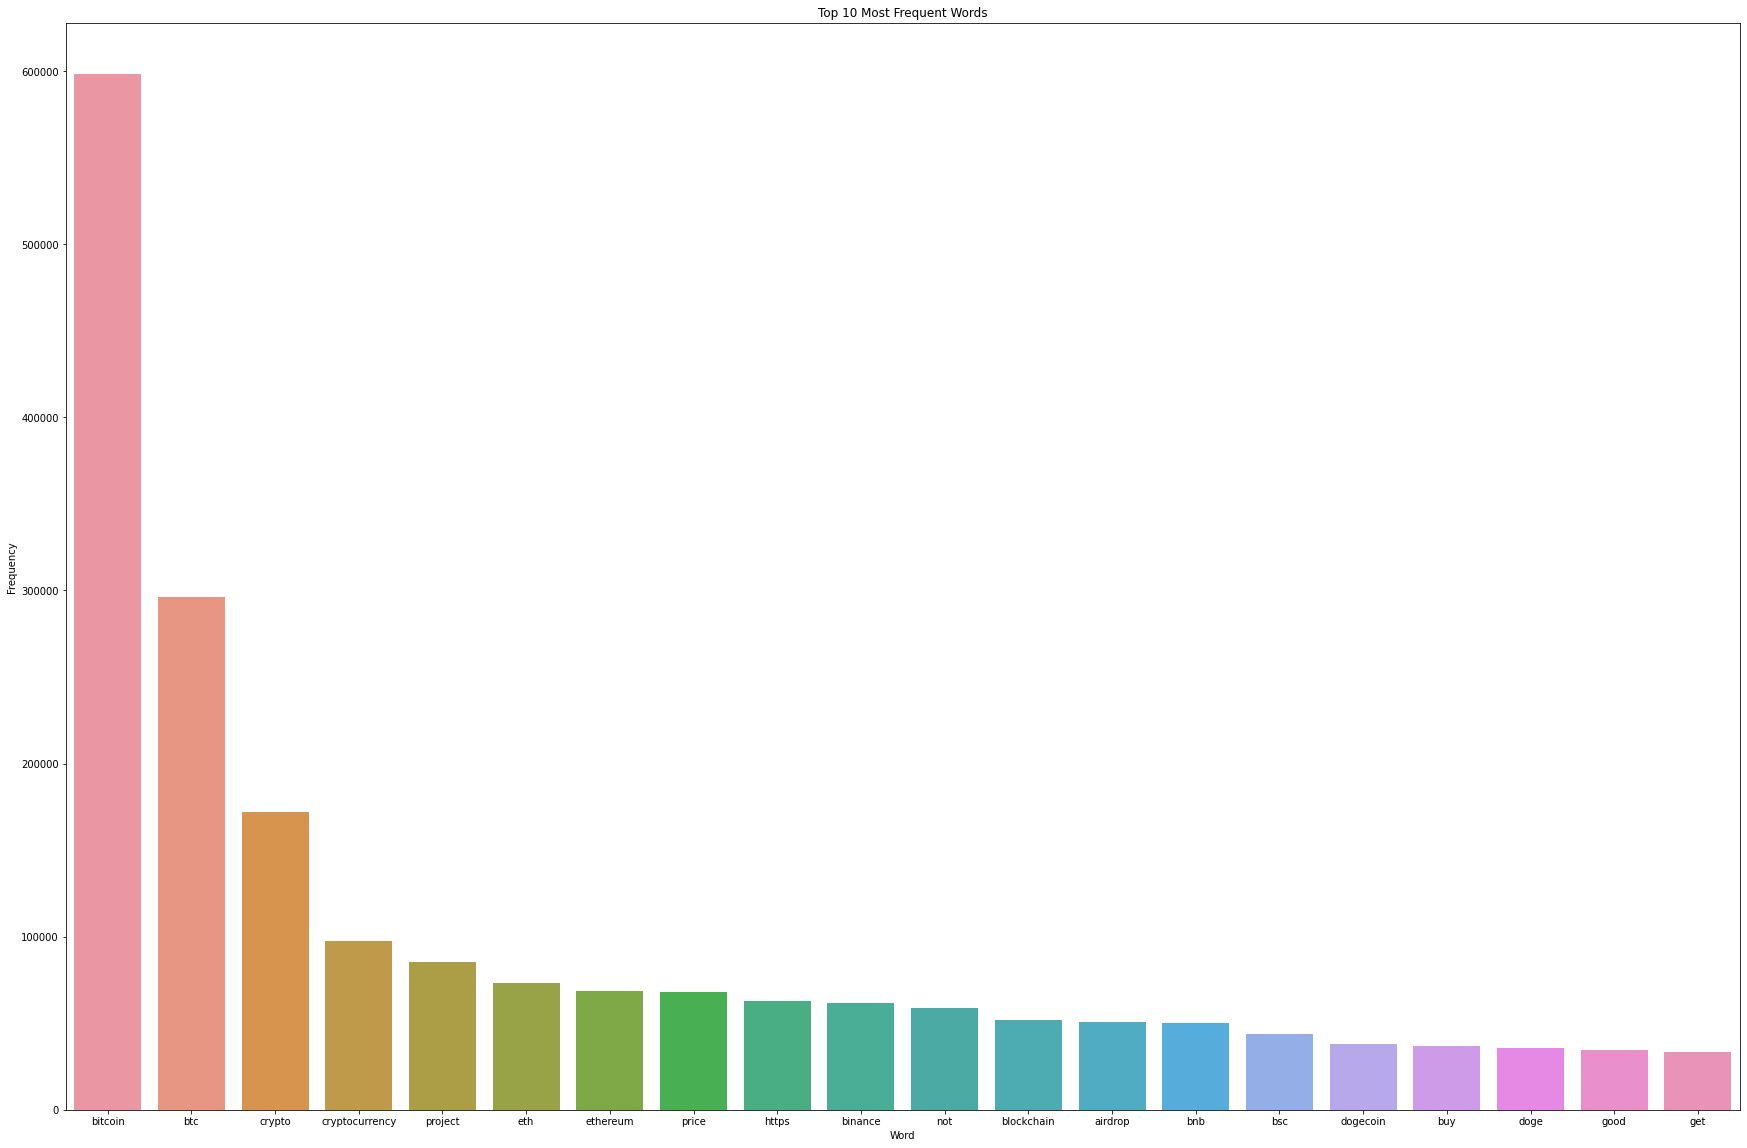

In [34]:

plt.figure(figsize=(30,20))
axis = sns.barplot(data=df_freq_words, x='Word', y='Frequency')
axis.set(ylabel='Frequency')
plt.title('Top 10 Most Frequent Words')
plt.show()

In [36]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score > 0:
        return 'Positive'
    else:
        return 'Neutral'

df_first_half['Analysis_Polarity'] = df_first_half['Polarity'].apply(getAnalysis)




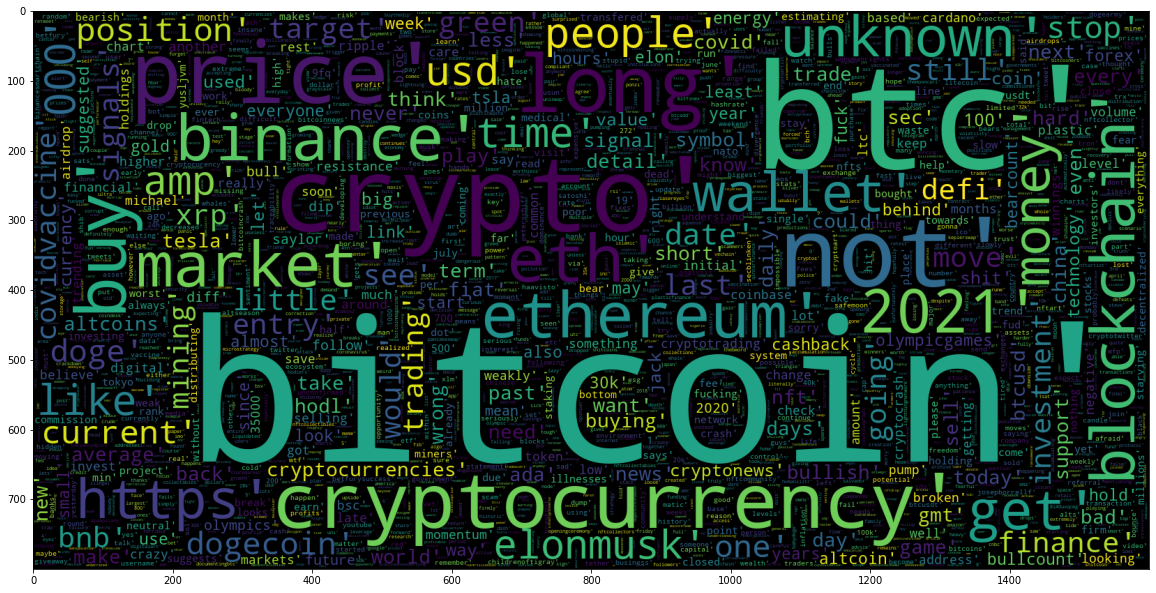

In [37]:
#plot a cloud for negative tweets

data_neg = df_first_half.loc[df_first_half['Analysis_Polarity'] == 'Negative']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 6000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(str(v) for v in data_neg['lemm_text']))
plt.imshow(wc)

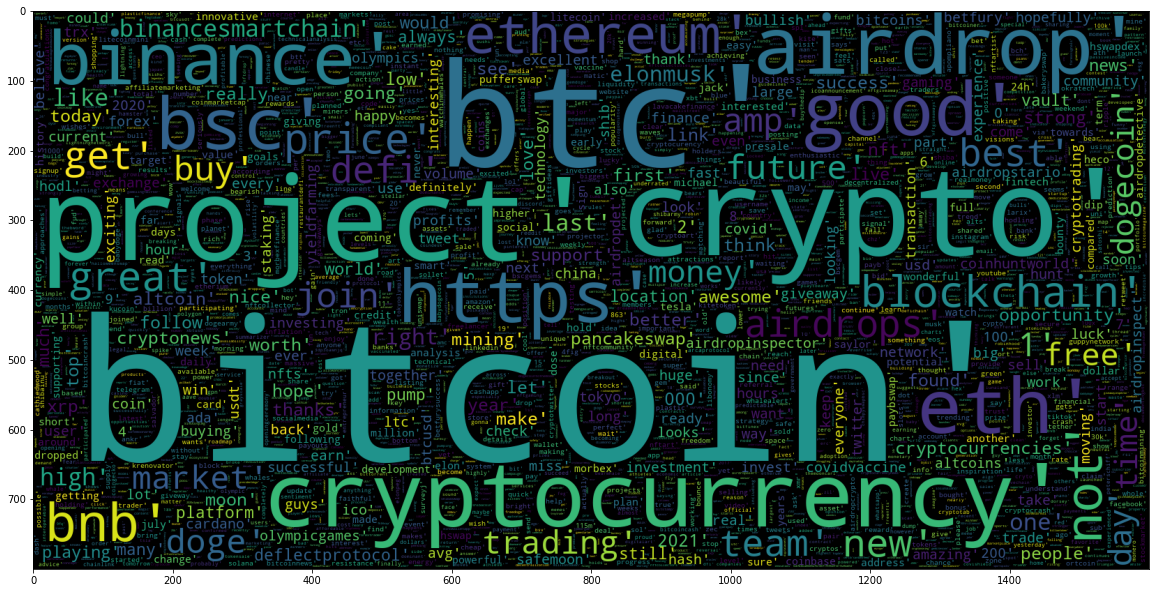

In [38]:
#plot a cloud for positive tweets
data_pos = df_first_half.loc[df_first_half['Analysis_Polarity'] == 'Positive']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 8000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(str(v) for v in data_pos['lemm_text']))
plt.imshow(wc)

In [ ]:
df_first_half.describe()


In [ ]:
# print('Printing positive tweets:\n')
# j=1
# sortedDF = df_first_half.sort_values(by=['Polarity']) #Sort the tweets
# for i in range(0, sortedDF.shape[0] ):
#     if( sortedDF['Analysis_Polarity'][i] == 'Positive'):
#         print(str(j) + ') '+ sortedDF['text'][i])
#         print()
#         j= j+1

In [46]:
df_first_half.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616401 entries, 21523 to 698237
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_name          616389 non-null  object 
 1   user_location      340225 non-null  object 
 2   user_description   553784 non-null  object 
 3   user_created       616401 non-null  object 
 4   user_followers     616401 non-null  object 
 5   user_friends       616401 non-null  object 
 6   user_favourites    616401 non-null  object 
 7   user_verified      616401 non-null  object 
 8   date               616401 non-null  object 
 9   text               616401 non-null  object 
 10  hashtags           599629 non-null  object 
 11  source             613068 non-null  object 
 12  is_retweet         616382 non-null  object 
 13  datetime           616401 non-null  object 
 14  is_datetime        616401 non-null  bool   
 15  text_token         616401 non-null  object 
 16

In [55]:
df_first_half['datetime'] = pd.to_datetime(df_first_half['datetime'], errors = 'coerce')



In [49]:
df_first_half.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616401 entries, 21523 to 698237
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_name          616389 non-null  object        
 1   user_location      340225 non-null  object        
 2   user_description   553784 non-null  object        
 3   user_created       616401 non-null  object        
 4   user_followers     616401 non-null  object        
 5   user_friends       616401 non-null  object        
 6   user_favourites    616401 non-null  object        
 7   user_verified      616401 non-null  object        
 8   date               616401 non-null  object        
 9   text               616401 non-null  object        
 10  hashtags           599629 non-null  object        
 11  source             613068 non-null  object        
 12  is_retweet         616382 non-null  object        
 13  datetime           616401 non-null  date

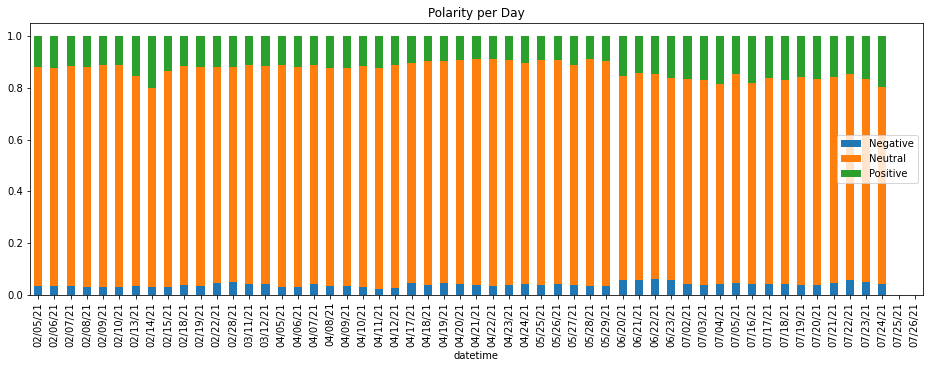

In [56]:
df_first_half['datetime'] = df_first_half['datetime'].dt.strftime('%D')
x = df_first_half[['datetime', 'Negative', 'Neutral', 'Positive']]
y = x.set_index('datetime')
z = y.groupby('datetime').mean()

z.plot.bar(stacked=True, title='Polarity per Day', figsize=(16,5))

In [ ]:
df_first_half['datetime'] = df_first_half['datetime'].dt.strftime('%D')
x = df_first_half[['datetime', 'Negative', 'Neutral', 'Positive']]
y = x.set_index('datetime')
z = y.groupby('datetime').mean()

z.plot.bar(stacked=True, title='Polarity per Day', figsize=(16,5))